<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  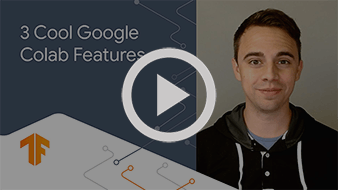
  </a>
</center>

TypeError: ignored

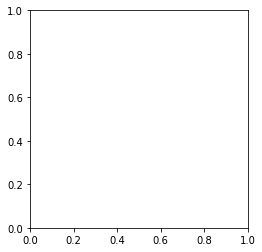

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
img = cv2.imread('/content/0a285c8b-1c31-48d4-89f2-af8b9edc36f6___RS_HL 5759.JPG', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])
(([], ),
 ([], ))

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


TypeError: ignored

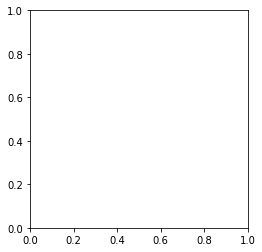

In [6]:
img = cv2.imread('/content/0a285c8b-1c31-48d4-89f2-af8b9edc36f6___RS_HL 5759.JPG', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

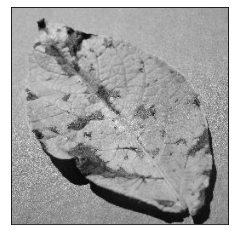

In [8]:
img = cv2.imread('/content/b6220993-c51f-48fa-bee9-fb5cb89cc0c4___RS_Early.B 7467.JPG', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

In [9]:
(([], ),
 ([], ))

(([],), ([],))

Text(0, 0.5, 'Frequency')

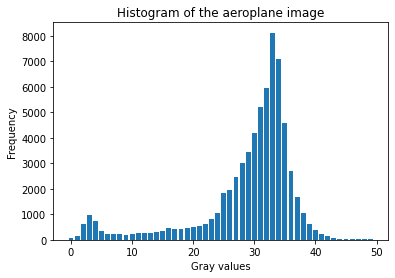

In [11]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the aeroplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

In [12]:
Text(0, 0.5, 'Frequency')

NameError: ignored

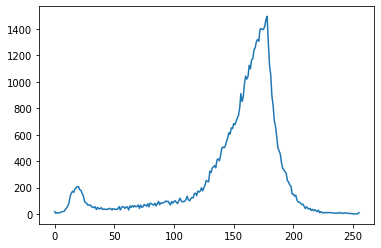

In [13]:
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

In [14]:
high = cv2.imread('/content/ba96aab6-adb5-4021-b6ad-3305f50aec12___RS_Early.B 7317.JPG')
low = cv2.imread('/content/bac19c19-ab8b-466a-a317-56c1f35fb082___RS_Early.B 7141.JPG')

ValueError: ignored

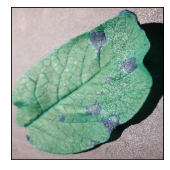

In [15]:
plt.subplot(122), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(123), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

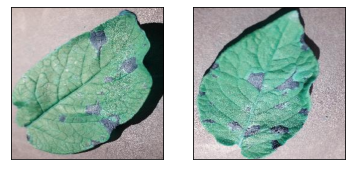

In [16]:
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

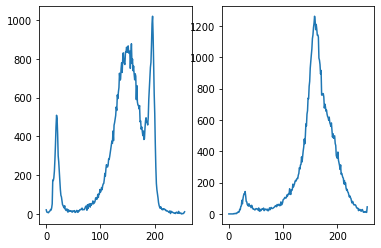

In [17]:
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

# Plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

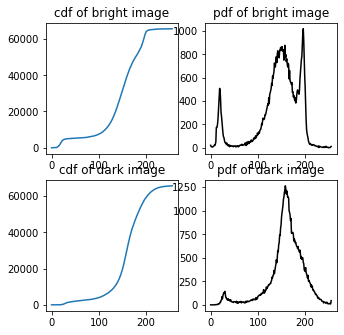

In [18]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

# plot cumulative histograms
plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('pdf of bright image')

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('pdf of dark image')

# adjust the placement of subplots
plt.subplots_adjust(bottom=2, right=0.8, top=3)

plt.show()

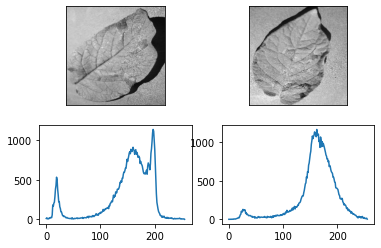

In [19]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)
# show images and their histograms
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

3-1 Brightness
In order to change the brightness and contrast of an image, two parameters are often used as a and b for contrast and brightness, respectively.

g(i,j)= a.f(i,j)+b


manip_image(image, alpha, beta) function gets a and b and produces the output image.

Below, we just manipulate the brightness value (b) and leave a=1 . We will return to changing b in the next section; b will manipulate image contrast.



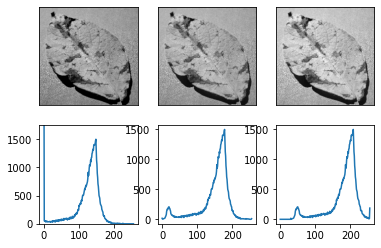

In [20]:
def manip_image(image, alpha, beta):
  
  new_image = np.zeros(image.shape, image.dtype)
  
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
  
  return new_image
# Test on the image
bright = manip_image(img, 1, 30)
dark = manip_image(img, 1, -30)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])), plt.ylim((0, 1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

You can see the histogram forward and backward shifts. When we increase and decrease brightness, histogram moves to brighter and darker regions, respectively.

([<matplotlib.lines.Line2D at 0x7f05fc8f5a10>], (0.0, 1100.0))

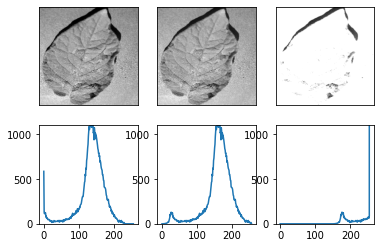

In [21]:
# Test on the dark image
l_bright = manip_image(low_gray, 1, 150)
l_dark = manip_image(low_gray, 1, -25)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(l_dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(l_bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([l_dark],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(235)
plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(236)
plt.plot(cv2.calcHist([l_bright],[0],None,[256],[0,256])), plt.ylim((0, 1100))

3-2 Contrast
   
Contrast of an image could be defined in different ways. One simple rule of thumb is to behave contrast as the distance between largest and smallest values in an image. In fact, the more the gray values are distributed over the 2^k-1 range, the more the contrast will be.

A uniform histogram with values distributed uniformly all over the intensity range will have the highest contrast. This will be the concept of our next section, Histogram equalization.

(0.0, 1750.0)

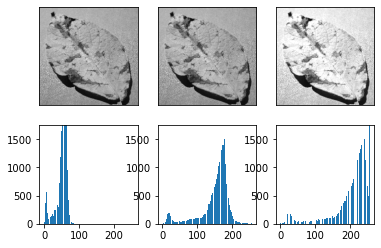

In [22]:
# Test on the image
increase_contrast = manip_image(img, 1.35, 0)
decrease_contrast = manip_image(img, 0.35, 0)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(decrease_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.bar(range(256), 
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

Histogram equalization

One usual method to stretch the intensity values of an image in order to make its histogram similar to the perfect histogram shape (uniformly distributed), is the histogram equalization. In this method, image histogram will be stretched with respect to its cumulative distribution function. Very good explanation of histogram equalization is found.

cv2.equalizeHist(src[, dst])

src : the only required argument is the original image to be equalized.

<BarContainer object of 256 artists>

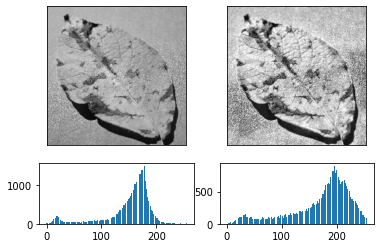

<div class="markdown-google-sans">
  <h1>What is Colab?</h1>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with 
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

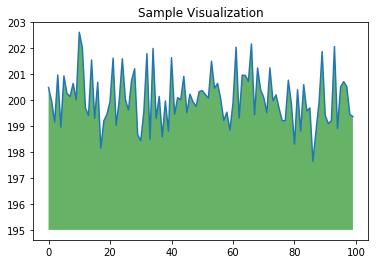

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagenerate= ImageDataGenerator(rescale= 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip= True)

In [ ]:
test_datagenerate= ImageDataGenerator(rescale=1)

In [ ]:
x_train= train_datagenerate.flow_from_directory('fruit-dataset/train',target_size=(128,128),batch_size=32,class_mode='cateorial')

ValueError: ignored

In [ ]:
x_train= train_datagenerate.flow_from_directory('fruit-dataset/train',target_size=(128,128),batch_size=32,class_mode='cateorial')

ValueError: ignored

In [ ]:
x_train= train_datagenerate.flow_from_directory('fruit-dataset/train',target_size=(128,128),batch_size=32,class_mode='categorial')

ValueError: ignored

In [ ]:
x_train= train_datagenerate.flow_from_directory('fruit-dataset/train',target_size=(128,128), batch_size=32 , class_mode = 'categorical')

NameError: ignored